In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [9]:
heatmap_data = pd.read_csv('results/pegasus/heatmap.csv')

In [10]:
heatmap_data

,Id,Creation Time,Owner,Tags,rouge1,rouge2,results/rougeL,gen_summ_len,filtered_l,text_len,...,parameters/input_json,method,parameters/summary_ratio,parameters/filtered,result_single/rouge1,filtered_lengths,result_single/rouge2,result_single/rougeL,result_single/rougeLsum,text_lengths
0,NEWS-211,2022-06-05 22:58:59,t.makowski,[],45.1803,16.6269,22.8683,211.02,6117.39,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[44.086, 48.1752, 46.6667, 41.3408, 37.5235, 5...","[6084, 1389, 7837, 9116, 14228, 4823, 3676, 19...","[10.8108, 8.8235, 13.9665, 6.729, 7.1563, 21.7...","[21.5054, 19.708, 21.1111, 17.5047, 16.1351, 2...","[21.5054, 19.708, 21.1111, 17.5047, 16.1351, 2...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."
1,NEWS-210,2022-06-05 22:52:00,t.makowski,[],47.3285,18.0626,23.8438,218.53,8644.02,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[46.4589, 43.5484, 42.4242, 37.4768, 46.2121, ...","[9120, 2574, 8658, 13701, 17201, 6451, 5210, 3...","[15.9544, 21.9512, 10.5263, 4.0968, 9.5057, 26...","[22.0963, 26.6129, 18.7328, 14.8423, 17.803, 2...","[22.0963, 26.6129, 18.7328, 14.8423, 17.803, 2...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."
2,NEWS-209,2022-06-05 22:44:55,t.makowski,[],46.6287,17.7712,23.6953,217.75,7751.77,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[43.4783, 45.2675, 50.838, 42.3792, 31.8182, 5...","[8563, 2408, 8160, 11821, 16398, 6015, 4717, 3...","[11.4478, 25.7261, 18.5393, 6.7164, 4.5627, 32...","[16.0535, 27.1605, 28.4916, 18.2156, 18.5606, ...","[16.0535, 27.1605, 28.4916, 18.2156, 18.5606, ...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."
3,NEWS-208,2022-06-05 20:32:36,t.makowski,[],47.8263,18.9547,24.3776,225.78,9799.35,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[49.7326, 46.3415, 46.8843, 35.8595, 40.2277, ...","[10214, 3765, 9155, 17816, 18114, 7673, 5681, ...","[16.129, 19.0184, 13.1343, 7.0501, 8.381, 28.8...","[21.9251, 28.0488, 20.178, 16.2662, 16.6983, 2...","[21.9251, 28.0488, 20.178, 16.2662, 16.6983, 2...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."
4,NEWS-207,2022-06-05 20:25:14,t.makowski,[],48.1610,18.8060,24.4875,226.19,9723.01,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[49.7326, 46.3415, 46.8843, 35.8595, 40.2277, ...","[10214, 3765, 9155, 17816, 18114, 7673, 5681, ...","[16.129, 19.0184, 13.1343, 7.0501, 8.381, 28.8...","[21.9251, 28.0488, 20.178, 16.2662, 16.6983, 2...","[21.9251, 28.0488, 20.178, 16.2662, 16.6983, 2...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."
5,NEWS-206,2022-06-05 19:23:41,t.makowski,[],48.0276,19.0688,24.6429,220.22,9255.50,9902.78,...,data/multinews/sample-v1_subj_scored_transform...,Pegasus,NaN,True,"[47.4667, 59.2145, 42.4242, 32.0833, 38.7716, ...","[9424, 3373, 8730, 15794, 17576, 6746, 5436, 3...","[15.0134, 28.5714, 10.5263, 7.5314, 11.1753, 3...","[20.2667, 38.0665, 18.7328, 13.3333, 17.6583, ...","[20.2667, 38.0665, 18.7328, 13.3333, 17.6583, ...","[10324, 3796, 9290, 18101, 18296, 7767, 5764, ..."


In [23]:
text_lengths = [j for i in heatmap_data.text_lengths for j in json.loads(i)]
filtered_lengths = [j for i in heatmap_data.filtered_lengths for j in json.loads(i)]
rouge1 = [j for i in heatmap_data['result_single/rouge1'] for j in json.loads(i)]
rouge2 = [j for i in heatmap_data['result_single/rouge2'] for j in json.loads(i)]
rougel = [j for i in heatmap_data['result_single/rougeL'] for j in json.loads(i)]

In [24]:
data_frame_scores = pd.DataFrame({
    'text_length': text_lengths,
    'filtered_length': filtered_lengths,
    'rouge1': rouge1,
    'rouge2': rouge2,
    'rougel': rougel,
    })

Text(0.5, 1.0, 'ROUGE1')

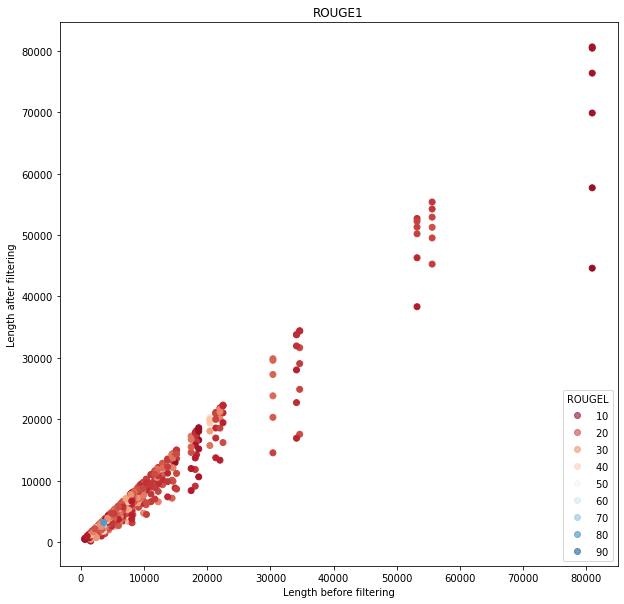

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 10))
c = ax.scatter(text_lengths, filtered_lengths, c=rougel, cmap='RdBu')
ax.set_xlabel('Length before filtering')
ax.set_ylabel('Length after filtering')
#ax.set_xlim(0, 20000)
#ax.set_ylim(0, 20000)
handles, labels = c.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower right", title="ROUGEL")
ax.set_title('ROUGE1')

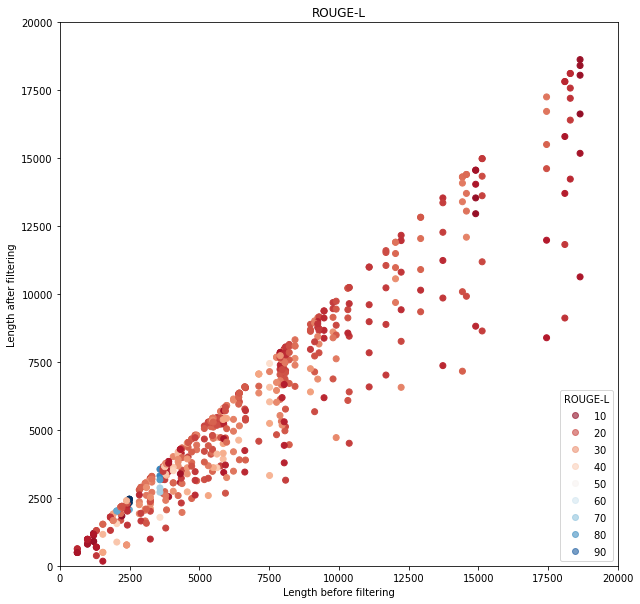

In [33]:
fig, ax = plt.subplots(1, figsize=(10, 10))
c = ax.scatter(text_lengths, filtered_lengths, c=rougel, cmap='RdBu')
ax.set_xlabel('Length before filtering')
ax.set_ylabel('Length after filtering')
ax.set_xlim(0, 20000)
ax.set_ylim(0, 20000)
handles, labels = c.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower right", title="ROUGE-L")
ax.set_title('ROUGE-L')
fig.savefig('rougel_heatmap.png')

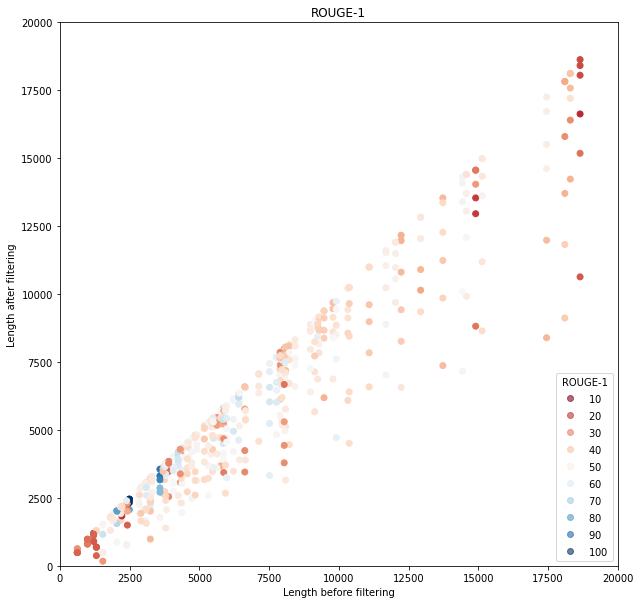

In [34]:
fig, ax = plt.subplots(1, figsize=(10, 10))
c = ax.scatter(text_lengths, filtered_lengths, c=rouge1, cmap='RdBu')
ax.set_xlabel('Length before filtering')
ax.set_ylabel('Length after filtering')
ax.set_xlim(0, 20000)
ax.set_ylim(0, 20000)
handles, labels = c.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower right", title="ROUGE-1")
ax.set_title('ROUGE-1')
fig.savefig('rouge1_heatmap.png')

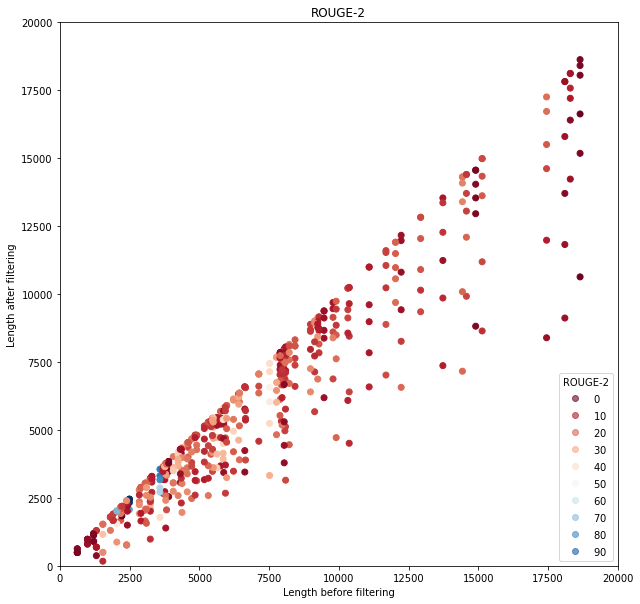

In [35]:
fig, ax = plt.subplots(1, figsize=(10, 10))
c = ax.scatter(text_lengths, filtered_lengths, c=rouge2, cmap='RdBu')
ax.set_xlabel('Length before filtering')
ax.set_ylabel('Length after filtering')
ax.set_xlim(0, 20000)
ax.set_ylim(0, 20000)
handles, labels = c.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower right", title="ROUGE-2")
ax.set_title('ROUGE-2')
fig.savefig('rouge2_heatmap.png')